In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Data Cleaning

In [24]:
# import data csv file
df = pd.read_csv('data.csv')
df

,address,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,property_url,zip,$/sqft,compare_$sqft_sold_inZip,household_median_income_on_threshold,median_age,median_house_value,poverty_rate,unemployment_rate,Target
0,"68 Putnam St, Weymouth, MA 02189",499900,2,5,2181.0,542700.0,3740.0,30,https://www.zillow.com/homedetails/68-Putnam-S...,2189,229,-0.4398,8.80,41.3,0.3644,0.071,0.055,1
1,"8 Ayer Rd, Shirley, MA 01464",289900,3,3,1200.0,304700.0,3425.0,5,https://www.zillow.com/homedetails/8-Ayer-Rd-S...,1464,242,1.0000,9.82,47.2,-0.0773,0.018,0.062,1
2,"17 Bowes Ave, Quincy, MA 02169",529900,2,4,1440.0,546500.0,2981.0,12,https://www.zillow.com/homedetails/17-Bowes-Av...,2169,368,0.0096,3.62,38.6,0.3277,0.095,0.056,1
3,"30 Dane St, Peabody, MA 01960",599999,2,4,1999.0,640900.0,3058.0,4,https://www.zillow.com/homedetails/30-Dane-St-...,1960,300,-0.1249,4.70,45.9,0.5480,0.067,0.039,1
4,"12 Whitney Dr, Peabody, MA 01960",650000,2,5,1760.0,694500.0,3200.0,3,https://www.zillow.com/homedetails/12-Whitney-...,1960,369,0.0858,4.70,45.9,0.6770,0.067,0.039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,"8 Higgins St, Shrewsbury, MA 01545",449000,2,3,2117.0,460800.0,2400.0,7,https://www.zillow.com/homedetails/8-Higgins-S...,1545,212,1.0000,50.02,41.9,0.0793,0.029,0.038,0
511,"32 Leighton St, Pepperell, MA 01463",559000,4,4,2735.0,593900.0,3962.0,27,https://www.zillow.com/homedetails/32-Leighton...,1463,204,1.0000,48.76,44.0,0.6278,0.038,0.035,0
512,"14 W Pine Dr, Walpole, MA 02081",579999,3,4,2080.0,590700.0,3733.0,11,https://www.zillow.com/homedetails/14-W-Pine-D...,2081,279,1.0000,67.91,40.8,0.1934,0.026,0.040,0
513,"119 Eastman Ave, Swampscott, MA 01907",670000,3,5,2796.0,708800.0,3800.0,12,https://www.zillow.com/homedetails/119-Eastman...,1907,240,-0.2575,61.09,45.0,0.4090,0.017,0.033,0


In [25]:
# drop unused columns, rows with null values
df1 = df.drop(['address', 'property_url', 'zip'], axis = 1)
df1 = df1.dropna()
df1 = df1.reset_index(drop = True)
df1

,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,$/sqft,compare_$sqft_sold_inZip,household_median_income_on_threshold,median_age,median_house_value,poverty_rate,unemployment_rate,Target
0,499900,2,5,2181.0,542700.0,3740.0,30,229,-0.4398,8.80,41.3,0.3644,0.071,0.055,1
1,289900,3,3,1200.0,304700.0,3425.0,5,242,1.0000,9.82,47.2,-0.0773,0.018,0.062,1
2,529900,2,4,1440.0,546500.0,2981.0,12,368,0.0096,3.62,38.6,0.3277,0.095,0.056,1
3,599999,2,4,1999.0,640900.0,3058.0,4,300,-0.1249,4.70,45.9,0.5480,0.067,0.039,1
4,650000,2,5,1760.0,694500.0,3200.0,3,369,0.0858,4.70,45.9,0.6770,0.067,0.039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,449000,2,3,2117.0,460800.0,2400.0,7,212,1.0000,50.02,41.9,0.0793,0.029,0.038,0
485,559000,4,4,2735.0,593900.0,3962.0,27,204,1.0000,48.76,44.0,0.6278,0.038,0.035,0
486,579999,3,4,2080.0,590700.0,3733.0,11,279,1.0000,67.91,40.8,0.1934,0.026,0.040,0
487,670000,3,5,2796.0,708800.0,3800.0,12,240,-0.2575,61.09,45.0,0.4090,0.017,0.033,0


In [93]:
# calculate number of samples in class 1
len(df1[df1['Target'] == 1])

214

In [94]:
# calculate number of samples in class 0
len(df1[df1['Target'] == 0])

275

### Data Exploration

In [26]:
# summary statistics
df1.describe()

,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,$/sqft,compare_$sqft_sold_inZip,household_median_income_on_threshold,median_age,median_house_value,poverty_rate,unemployment_rate,Target
count,489.000000,489.000000,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,557208.300613,2.384458,3.670757,1958.98364,584046.216769,3075.597137,25.179959,303.353783,0.376544,42.063129,42.472188,0.359450,0.037601,0.041088,0.437628
std,95867.247875,0.633300,0.898532,615.01445,102287.588340,574.832723,33.245675,84.107998,0.555104,25.237800,3.487502,0.262757,0.020767,0.012963,0.496602
min,194000.000000,2.000000,3.000000,912.00000,207300.000000,1104.000000,0.000000,87.000000,-0.821800,0.270000,28.300000,-0.533600,0.000000,0.012000,0.000000
25%,499900.000000,2.000000,3.000000,1540.00000,521200.000000,2799.000000,5.000000,245.000000,-0.093700,19.310000,40.000000,0.189600,0.023000,0.032000,0.000000
50%,569900.000000,2.000000,3.000000,1848.00000,592200.000000,3058.000000,12.000000,294.000000,0.172100,39.420000,41.900000,0.333200,0.033000,0.039000,0.000000
75%,629900.000000,3.000000,4.000000,2232.00000,657500.000000,3363.000000,33.000000,354.000000,1.000000,58.870000,44.800000,0.509500,0.044000,0.049000,1.000000
max,699999.000000,6.000000,10.000000,6853.00000,763700.000000,5563.000000,320.000000,723.000000,1.000000,94.160000,56.100000,1.383300,0.095000,0.081000,1.000000


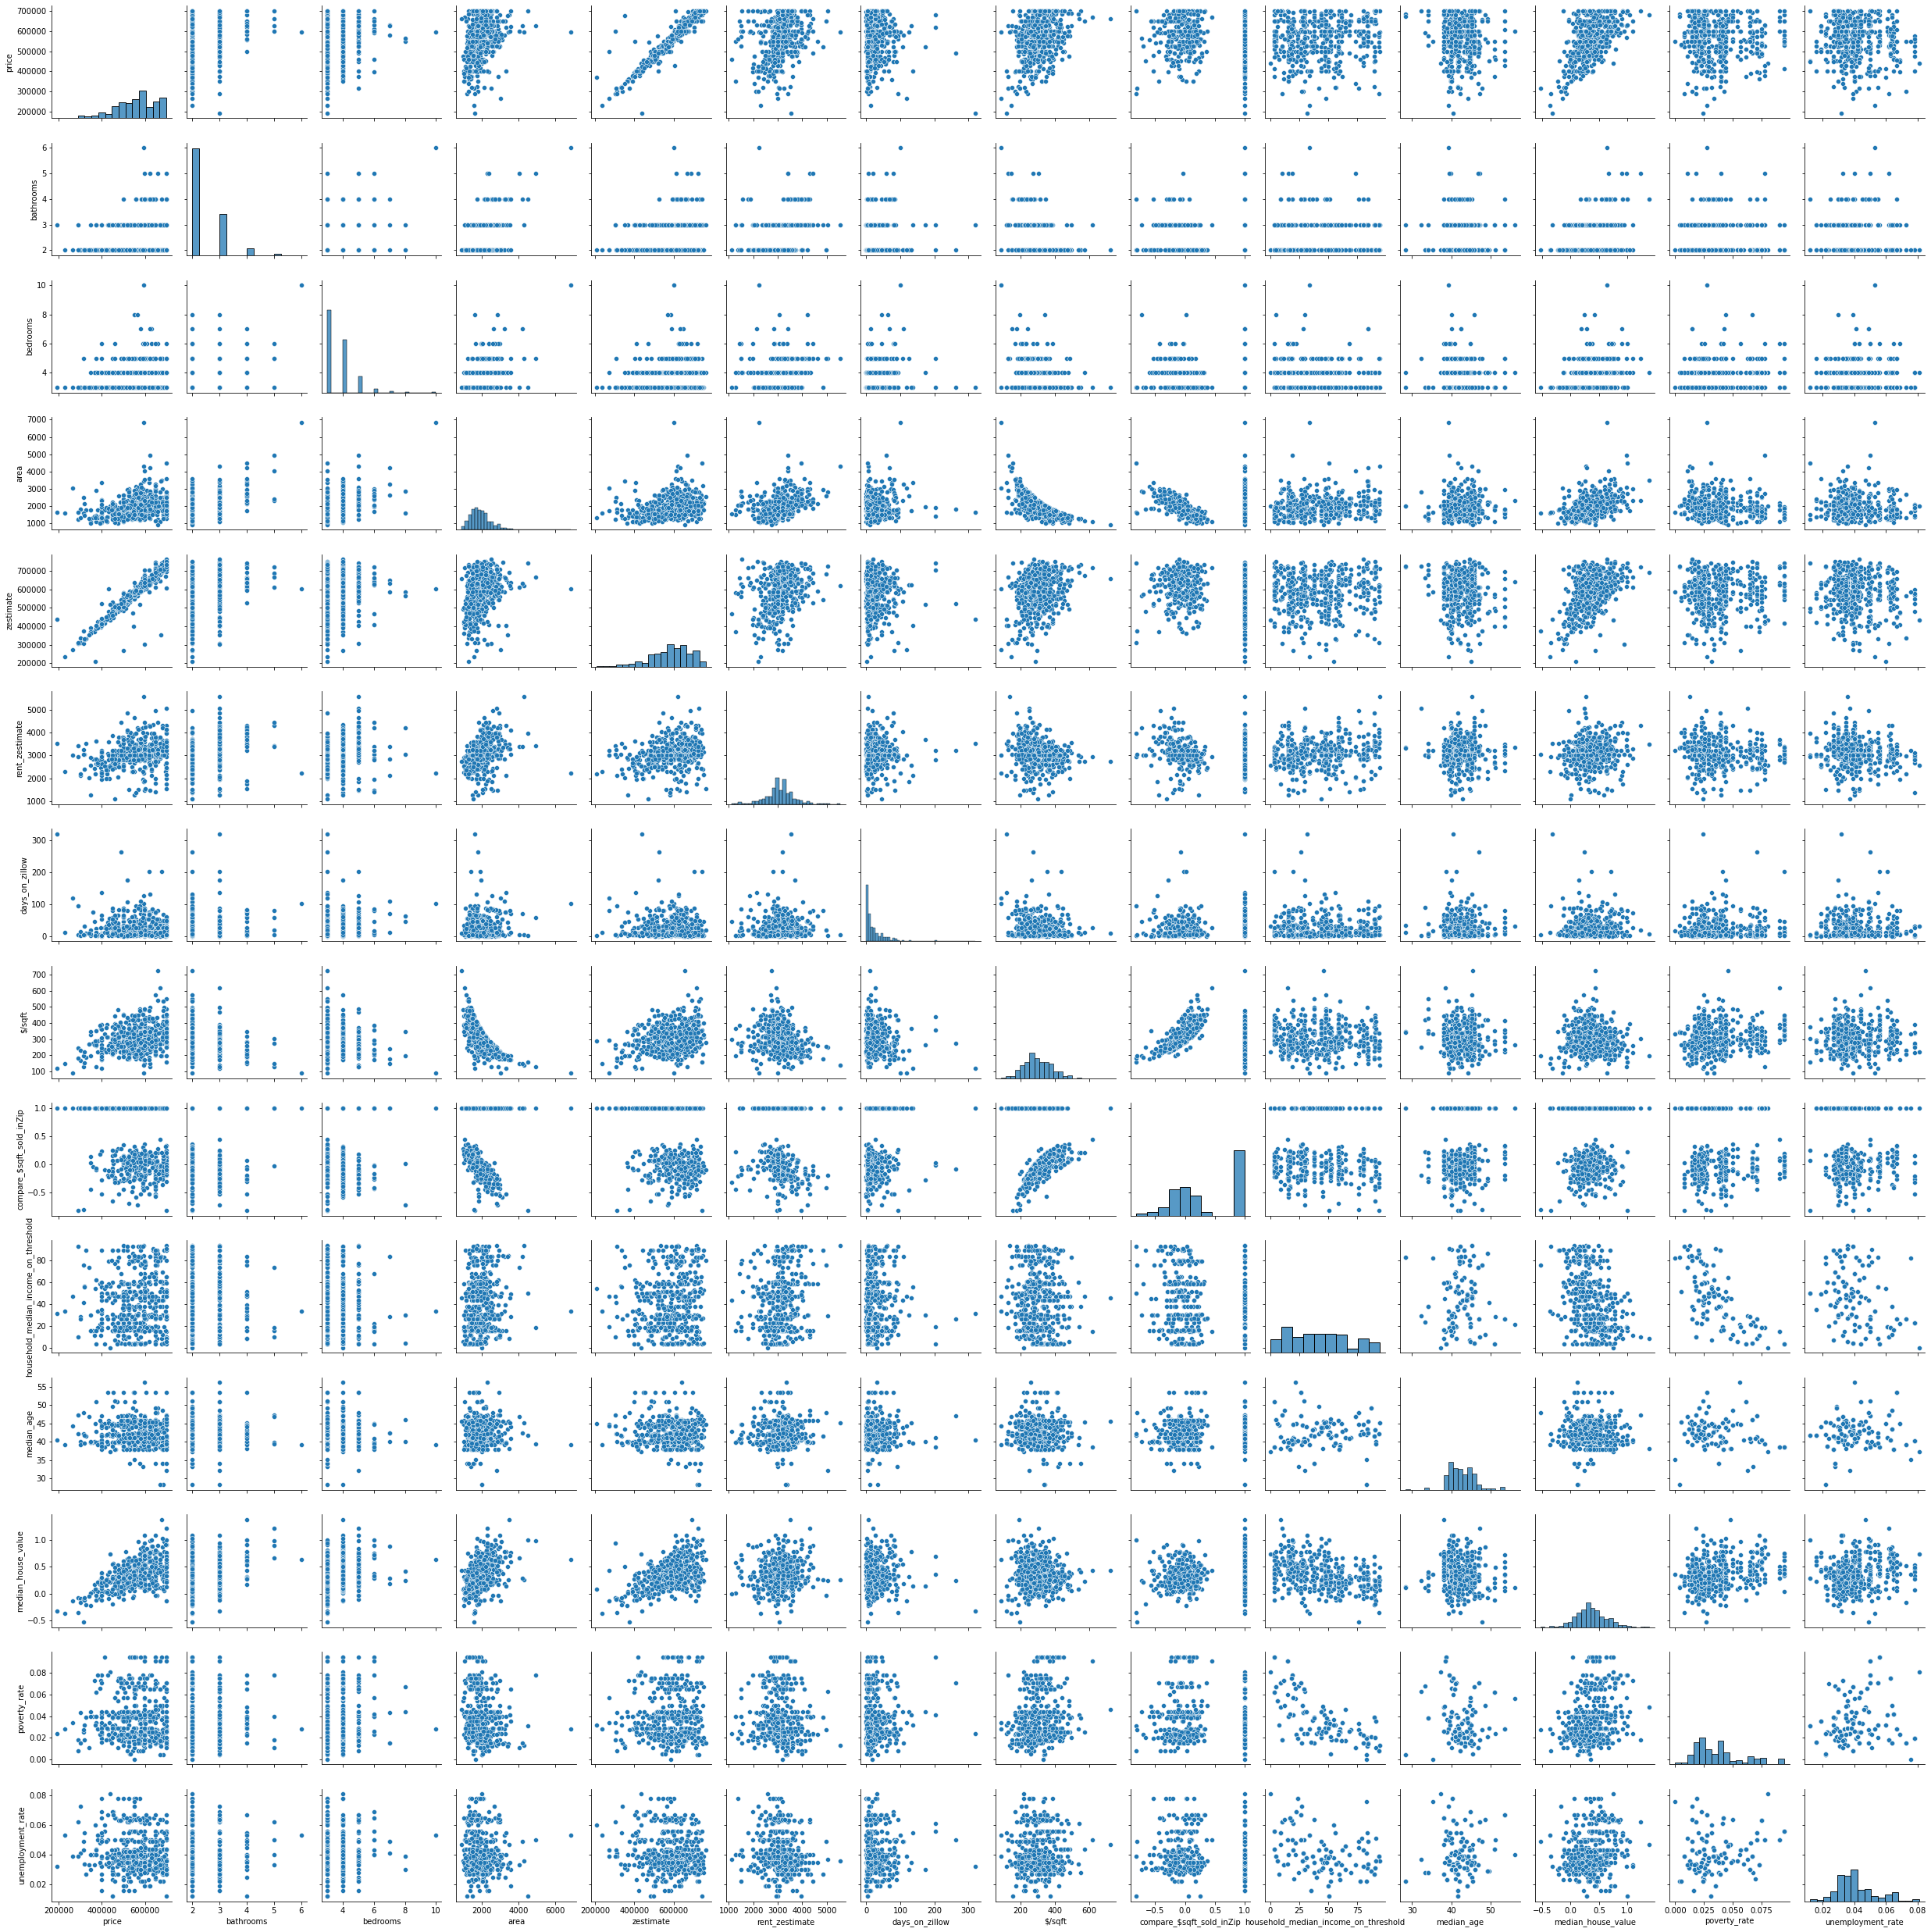

In [27]:
# pairplot for all feature variables
sns.pairplot(df1.drop(['Target'], axis = 1))

### Test for Multicollinearity

In [29]:
# select indep variables
indep = df1.drop(['Target'], axis = 1)

# add a constant (required for vif function)
indep = add_constant(indep)

# create df with target and vif values
vif = pd.DataFrame()
vif['feature'] = indep.columns
vif['vif'] = [variance_inflation_factor(indep.values, i)
              for i in range(len(indep.columns))]

vif

,feature,vif
0,const,332.010669
1,price,13.116851
2,bathrooms,1.619873
3,bedrooms,1.390516
4,area,7.117570
5,zestimate,8.788574
6,rent_zestimate,1.299501
7,days_on_zillow,1.057184
8,$/sqft,6.507405
9,compare_$sqft_sold_inZip,1.434920


In [30]:
# drop zestimate
indep1 = indep.drop(['zestimate'], axis = 1)

# create df with target and vif values
vif1 = pd.DataFrame()
vif1['feature'] = indep1.columns
vif1['vif'] = [variance_inflation_factor(indep1.values, i)
              for i in range(len(indep1.columns))]

vif1

,feature,vif
0,const,326.555788
1,price,5.349309
2,bathrooms,1.616827
3,bedrooms,1.389380
4,area,7.095372
5,rent_zestimate,1.293726
6,days_on_zillow,1.044935
7,$/sqft,6.501244
8,compare_$sqft_sold_inZip,1.384882
9,household_median_income_on_threshold,3.195425


In [31]:
# drop $/sqft
indep2 = indep1.drop(['$/sqft'], axis = 1)

# create df with target and vif values
vif2 = pd.DataFrame()
vif2['feature'] = indep2.columns
vif2['vif'] = [variance_inflation_factor(indep2.values, i)
              for i in range(len(indep2.columns))]

vif2

,feature,vif
0,const,276.267917
1,price,2.287516
2,bathrooms,1.599251
3,bedrooms,1.389349
4,area,2.122017
5,rent_zestimate,1.264135
6,days_on_zillow,1.043779
7,compare_$sqft_sold_inZip,1.348675
8,household_median_income_on_threshold,3.171736
9,median_age,1.055528


### Data Preprocessing

In [32]:
# select features and taget
features = df1.drop(['Target', 'zestimate', '$/sqft'], axis = 1)
target = df1['Target']

In [33]:
# split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 3000)

### Model Construction

In [34]:
# initiate models without hyperparameter tuning
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression(solver = 'liblinear')
svm_model = svm.SVC()

In [35]:
# function to predict classification and report accuracy given a model
def predict(model):
    # fit model using training data
    model.fit(x_train, y_train)
    
    # predict classification using training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # report classification accuracies and errors
    print('The training classification accuracy is ' + str(round(train_accuracy, 5) * 100) + '%')
    print('The testing classification accuracy is ' + str(round(test_accuracy, 5) * 100) + '%')

In [36]:
# knn
predict(knn_model)

The training classification accuracy is 71.585%
The testing classification accuracy is 44.714999999999996%


In [37]:
# logistic regression
predict(logreg_model)

The training classification accuracy is 57.104%
The testing classification accuracy is 62.602000000000004%


In [38]:
# svm
predict(svm_model)

The training classification accuracy is 56.557%
The testing classification accuracy is 55.285%


### Model Optimization

In [55]:
# define param grids for each model
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                 'weights': ['uniform', 'distance'], 
                 'metric': ['euclidean', 'manhattan']}

logreg_param_grid = {'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 100]}

svm_param_grid = {'kernel': ['linear', 'rbf'], 
                 'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 100]}

In [47]:
# run grid search on knn model
knn_grid_search = GridSearchCV(knn_model, param_grid = knn_param_grid, scoring = 'accuracy', cv = 3)
knn_grid_search.fit(x_train, y_train)

print('Best parameters: ', knn_grid_search.best_params_)
print('Best cross-validation score: ', knn_grid_search.best_score_)
print('Test set score: ', knn_grid_search.score(x_test, y_test))

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score:  0.5546448087431693
Test set score:  0.5040650406504065


<AxesSubplot:xlabel='N Neighbors', ylabel='Accuracy'>

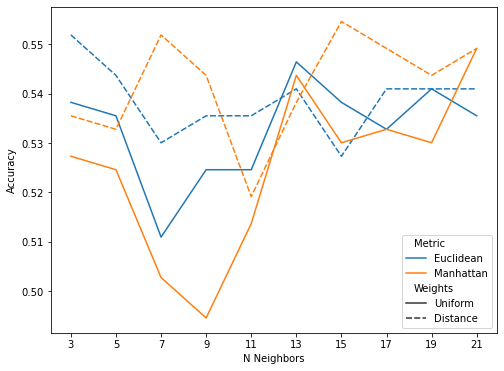

In [82]:
# clean results df
knn_results = pd.DataFrame(knn_grid_search.cv_results_['params'])
knn_results['Accuracy'] = knn_grid_search.cv_results_['mean_test_score']
knn_results.rename(columns = {'n_neighbors': 'N Neighbors', 'metric': 'Metric', 'weights': 'Weights'}, inplace = True)
knn_results['Metric'] = knn_results['Metric'].map({'euclidean': 'Euclidean', 'manhattan': 'Manhattan'})
knn_results['Weights'] = knn_results['Weights'].map({'uniform': 'Uniform', 'distance': 'Distance'})

# plot results
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xticks([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
sns.lineplot(x = 'N Neighbors', y = 'Accuracy', data = knn_results, hue = 'Metric', style = 'Weights', ax = ax)

In [49]:
# run grid search on logistic regression model
logreg_grid_search = GridSearchCV(logreg_model, param_grid = logreg_param_grid, scoring = 'accuracy', cv = 3)
logreg_grid_search.fit(x_train, y_train)

print('Best parameters: ', logreg_grid_search.best_params_)
print('Best cross-validation score: ', logreg_grid_search.best_score_)
print('Test set score: ', logreg_grid_search.score(x_test, y_test))

Best parameters:  {'C': 1, 'penalty': 'l1'}
Best cross-validation score:  0.6475409836065573
Test set score:  0.5447154471544715


<ipython-input-76-719ba21e166e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1, 10, 100])


<AxesSubplot:xlabel='C', ylabel='Accuracy'>

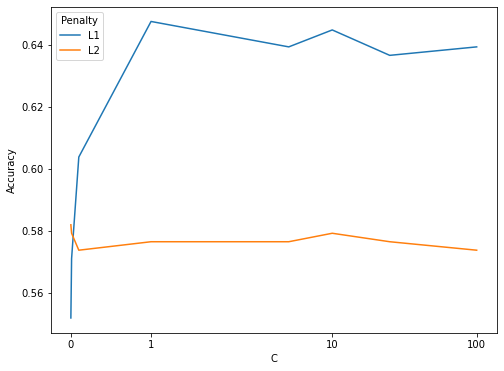

In [76]:
# clean results df
logreg_results = pd.DataFrame(logreg_grid_search.cv_results_['params'])
logreg_results['Accuracy'] = logreg_grid_search.cv_results_['mean_test_score']
logreg_results.rename(columns = {'penalty': 'Penalty'}, inplace = True)
logreg_results['Penalty'] = logreg_results['Penalty'].map({'l1': 'L1', 'l2': 'L2'})

# plot results
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xscale('symlog')
ax.set_xticklabels([0, 1, 10, 100])
sns.lineplot(x = 'C', y = 'Accuracy', data = logreg_results, hue = 'Penalty', ax = ax)

In [56]:
# run grid search on svm model
svm_grid_search = GridSearchCV(svm_model, param_grid = svm_param_grid, scoring = 'accuracy', cv = 3)
svm_grid_search.fit(x_train, y_train)

print('Best parameters: ', svm_grid_search.best_params_)
print('Best cross-validation score: ', svm_grid_search.best_score_)
print('Test set score: ', svm_grid_search.score(x_test, y_test))

Best parameters:  {'C': 10, 'kernel': 'linear'}
Best cross-validation score:  0.5710382513661202
Test set score:  0.6097560975609756


<ipython-input-78-d00724fc4410>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1, 10, 100])


<AxesSubplot:xlabel='C', ylabel='Accuracy'>

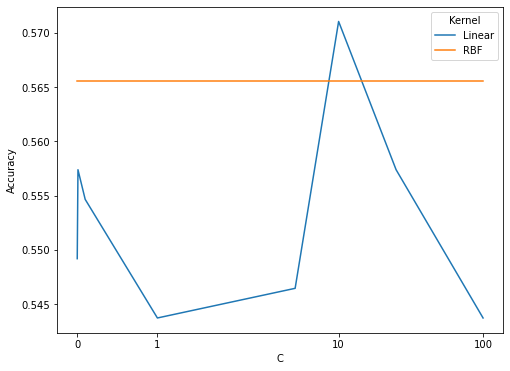

In [78]:
# clean results df
svm_results = pd.DataFrame(svm_grid_search.cv_results_['params'])
svm_results['Accuracy'] = svm_grid_search.cv_results_['mean_test_score']
svm_results.rename(columns = {'kernel': 'Kernel'}, inplace = True)
svm_results['Kernel'] = svm_results['Kernel'].map({'linear': 'Linear', 'rbf': 'RBF'})

# plot results
fig, ax = plt.subplots(figsize = (8,6))
ax.set_xscale('symlog')
ax.set_xticklabels([0, 1, 10, 100])
sns.lineplot(x = 'C', y = 'Accuracy', data = svm_results, hue = 'Kernel', ax = ax)